## 지도학습(회귀)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 불러오기

In [17]:
# 데이터 생성
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [13]:
# train sample
X_train.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
74,0.012648,0.050680,0.002417,0.056301,0.027326,0.017162,0.041277,-0.039493,0.003709,0.073480
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220
45,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014960,-0.050783


In [14]:
# target sample
y_train.head()

74      85.0
26     137.0
45      53.0
389     51.0
154    197.0
Name: target, dtype: float64

<Axes: >

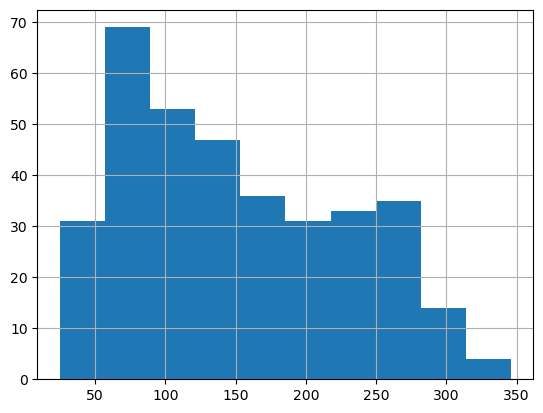

In [15]:
# target check
# 당뇨별 진행률(target)
y_train.hist()

50~100 사이가 가장 많고, x축 값이 증가함에 따라 그 수치는 점점 작아진다.

## 선형 회귀

In [18]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

2707.6318521641583

## 릿지 회귀

In [33]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge() # default alpha=1 이것으로 규제를 조정할 수 있다.
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

3522.1191842072662

규제가 있는 릿지 회귀임에도 오차가 더 크다.  
오차가 더 크므로 더 좋지 못한 모델이 된다.

In [34]:
# 회귀 계수
# 출력되는 값들은 피처들의 순서다. (age, sex..의 회귀 계수)
model.coef_

array([  31.2934206 ,  -71.44865465,  267.60596214,  197.36249197,
         14.61325736,  -13.88423665, -124.64983613,  106.21296724,
        221.0684933 ,  101.20254637])

어떤 변수의 회귀계수인지 판단하기 어려우므로 dataframe으로 변경한다.

In [35]:
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [36]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [37]:
# 릿지 회귀 alpha=10으로 조정
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

5521.884843903383

In [39]:
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


In [40]:
# 릿지 회귀 alpha=0.1로 조정
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

2744.9026742146693

In [41]:
coef['alpha0.1'] = model.coef_
coef

,alpha1,alpha10,alpha0.1
age,31.293421,16.703166,4.275162
sex,-71.448655,-1.796418,-205.210484
bmi,267.605962,61.026376,450.909749
bp,197.362492,47.434846,331.923682
s1,14.613257,18.491238,-84.311149
s2,-13.884237,13.440104,-54.662514
s3,-124.649836,-35.542087,-158.706512
s4,106.212967,38.896140,114.066890
s5,221.068493,55.276290,391.231834
s6,101.202546,35.868345,78.555458


In [42]:
# 릿지 회귀 alpha=0.05로 조정
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

2699.6595785438312

In [43]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,31.293421,16.703166,4.275162,-0.508850
sex,-71.448655,-1.796418,-205.210484,-223.345659
bmi,267.605962,61.026376,450.909749,469.447848
bp,197.362492,47.434846,331.923682,348.368885
s1,14.613257,18.491238,-84.311149,-146.952481
s2,-13.884237,13.440104,-54.662514,-18.297550
s3,-124.649836,-35.542087,-158.706512,-141.658486
s4,106.212967,38.896140,114.066890,115.860926
s5,221.068493,55.276290,391.231834,432.508101
s6,101.202546,35.868345,78.555458,69.578796


## 라쏘 회귀

In [45]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso() # default alpha 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

4179.152642946345

In [47]:
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef
# 중요하다고 생각되는 피처만 남겨두고 나머지는 0으로 만든다.

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [48]:
# 라쏘 회귀 alpha2
from sklearn.linear_model import Lasso
model = Lasso(alpha=2) 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

6398.637179449031

In [49]:
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


alpha2가 되면 bmi제외하고 나머지는 0으로 만든다.

In [50]:
# 라쏘 회귀 alpha=0.05
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.05) 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

2703.4583679188177

In [52]:
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,-0.000000,-0.000000
sex,-0.000000,-198.948213,-198.948213
bmi,343.589790,487.198584,487.198584
bp,46.369923,340.490360,340.490360
s1,0.000000,-95.576361,-95.576361
s2,0.000000,-0.000000,-0.000000
s3,-0.000000,-189.867452,-189.867452
s4,0.000000,10.487703,10.487703
s5,245.170617,457.332197,457.332197
s6,0.000000,39.292925,39.292925


릿지는 L2 규제, 라쏘는 L1 규제를 통해서 회귀 모델을 만들게 된다.

## 엘라스틱넷 회귀

In [54]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

6539.270961171604

In [59]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6) # default l1_ratio 0.5 
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # 오차숫자는 작을수록 좋음

2675.6031657225317

가장 작은 오차 값을 낸 모델이라고 볼 수 있다.